In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import seaborn as sns
from sklearn import decomposition
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


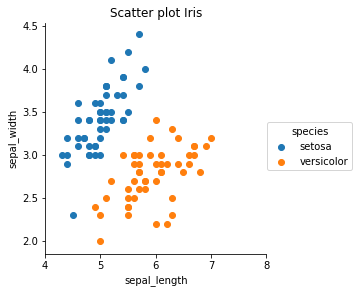

In [26]:
# select setosa and versicolor
iris2 = iris.iloc[0:100, :]
g1=sns.FacetGrid(iris2, hue="species", size=4) .map(plt.scatter,"sepal_length", "sepal_width" ).add_legend()
g1.ax.set_xlim(4, 8)
plt.title('Scatter plot Iris')
plt.savefig('images/01_pca_lda2.png', dpi=300)

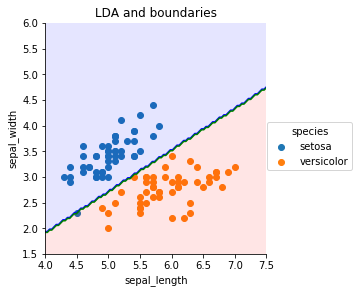

In [17]:
# extract sepal length and sepal width
X_data2 = iris2.iloc[:, [0,1]].values
y_data2 = iris2.iloc[:, 4].replace({'setosa':0,'versicolor':1}).copy()

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_data2,y_data2)
    
# Our 2-dimensional distribution will be over variables X and Y
N = 100
X = np.linspace(4, 7.5, N)
Y = np.linspace(1.5, 6, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris2, hue="species", size=4) .map(plt.scatter, "sepal_length", "sepal_width",).add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz = np.array(  [lda.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)


#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('sepal_length')
my_ax.set_ylabel('sepal_width')
my_ax.set_title('LDA and boundaries')


#plt.savefig('images/02_pca_lda2.png', dpi=300)
plt.show()

In [18]:
pca = decomposition.PCA(n_components=2)
# extract sepal length and sepal width
X_data = iris.iloc[0:100, :4].values
#print(X_data)
pca.fit(X_data)
data = pca.transform(X_data)

vr = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)

[0.90539269 0.07445563]


In [19]:

df = pd.DataFrame(data, columns=["PC1", "PC2"])
df['species'] = iris.iloc[0:100, 4]
y_labels = iris.iloc[0:100, 4].replace({'setosa':0,'versicolor':1}).copy()


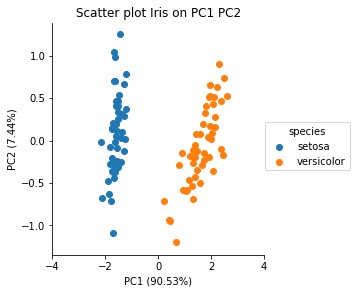

In [25]:

g=sns.FacetGrid(df, hue="species", size=4) .map(plt.scatter,"PC1", "PC2", ).add_legend()
plt.title('Scatter plot Iris on PC1 PC2')
g.ax.set_xlabel('PC1 (90.53%)')
g.ax.set_ylabel('PC2 (7.44%)')
g.ax.set_xlim(-4, 4)
plt.savefig('images/03_pca_lda2.png', dpi=300)

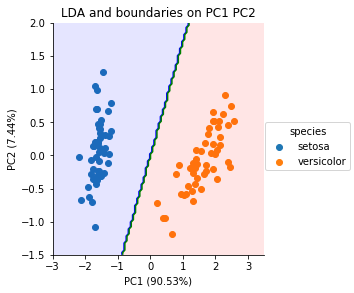

In [14]:


lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(data,y_labels)


# Our 2-dimensional distribution will be over variables X and Y
N = 100
X3 = np.linspace(-3, 3.5, N)
Y3 = np.linspace(-1.5, 2, N)
X3, Y3 = np.meshgrid(X3, Y3)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df, hue="species", size=4, ) .map(plt.scatter, "PC1", "PC2",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz3 = np.array(  [lda.predict( np.array([[xx3,yy3]])) 
                     for xx3, yy3 in zip(np.ravel(X3), np.ravel(Y3)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z3 = zz3.reshape(X3.shape)


#Plot the filled and boundary contours
my_ax.contourf( X3, Y3, Z3, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X3, Y3, Z3, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('PC1 (90.53%)')
my_ax.set_ylabel('PC2 (7.44%)')
my_ax.set_title('LDA and boundaries on PC1 PC2')


plt.savefig('images/04_pca_lda2.png', dpi=300)
plt.show()

In [33]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(data,y_labels).transform(data)

l = [i for i in range(0,100)]
df1 = pd.DataFrame(X_r2, columns=["LD1"])
df1['cases']=l
df1['species'] = iris.iloc[0:100, 4]

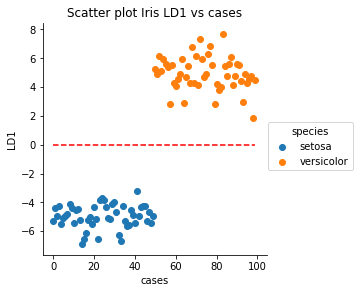

In [42]:
g=sns.FacetGrid(df1, hue="species", size=4) .map(plt.scatter,"cases", "LD1", ).add_legend()
plt.title('Scatter plot Iris LD1 vs cases')
g.ax.set_xlabel('cases')
g.ax.set_ylabel('LD1')
#g.ax.set_xlim(-4, 4)
#####horizontal line
horiz_line_data = np.array([0 for i in range(0,100)])
plt.plot(df1.cases, horiz_line_data, 'r--') 
###########
plt.savefig('images/01_lda_lda22.png', dpi=300)